# California Housing Prices - ML Project

The dataset is about housing prices in California. It is used to predict the median house value (median_house_value) in different districts based on various demographic and geographic characteristics.

Main task: Regression problem to predict the continuous variable median_house_value.

## Preparation

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

# Main Libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate

In [ ]:
from google.colab import files
uploaded = files.upload()
import os
os.listdir('/content')

csv_file_path = "/content/housing.csv"
df = pd.read_csv(csv_file_path)

df.head()

Saving housing.csv to housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Description of Data

### Dataset description

In [ ]:
# Check for null values in each column
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Display the data types of each column
print(df.dtypes)

# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
Number of rows: 20640
Number of columns: 10


### Numerical variables visualization

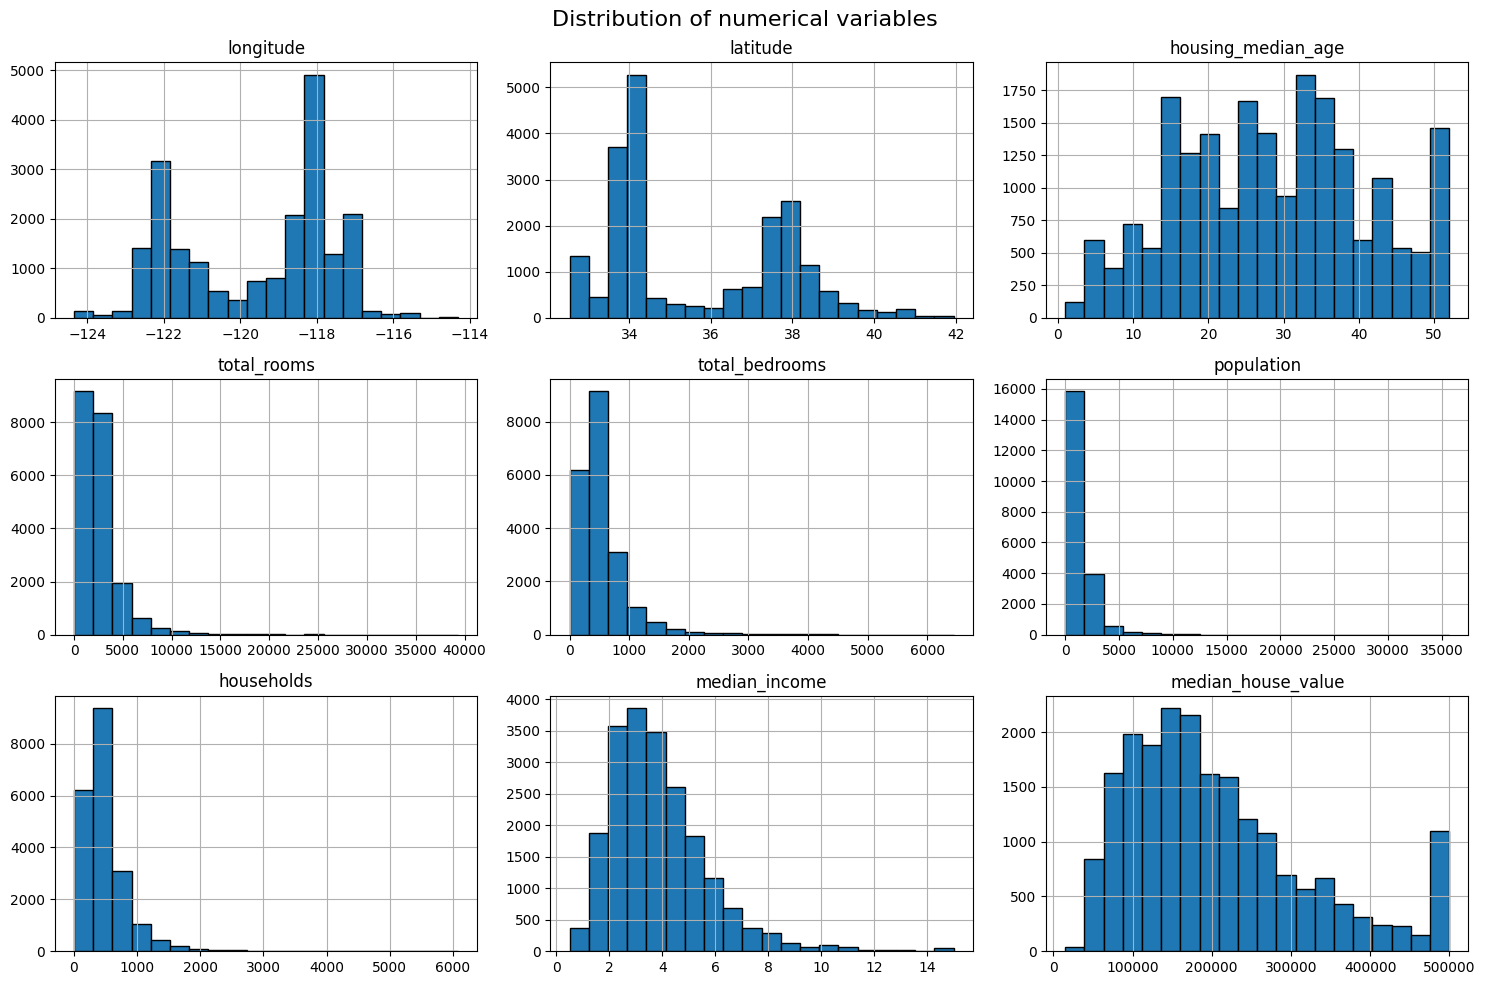

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms for numerical feature
df[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of numerical variables", fontsize=16)
plt.tight_layout()
plt.show()

### Categorical variables visualization

<ipython-input-8-b0231dbcdd1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ocean_proximity_counts.index, y=ocean_proximity_counts.values, palette="viridis")


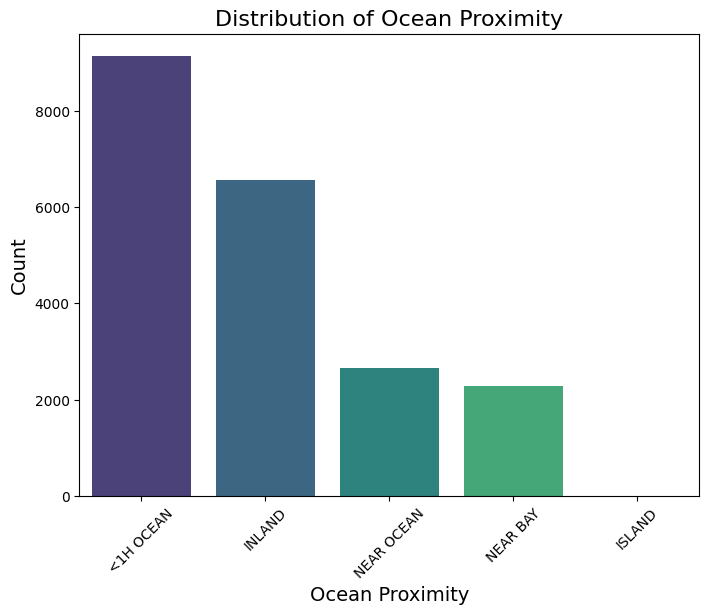

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [ ]:
# Count the occurrences of each category for the unique categorical feature
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=ocean_proximity_counts.index, y=ocean_proximity_counts.values, palette="viridis")

# Add labels and title
plt.title("Distribution of Ocean Proximity", fontsize=16)
plt.xlabel("Ocean Proximity", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

print(ocean_proximity_counts)

### Correlation Heatmap

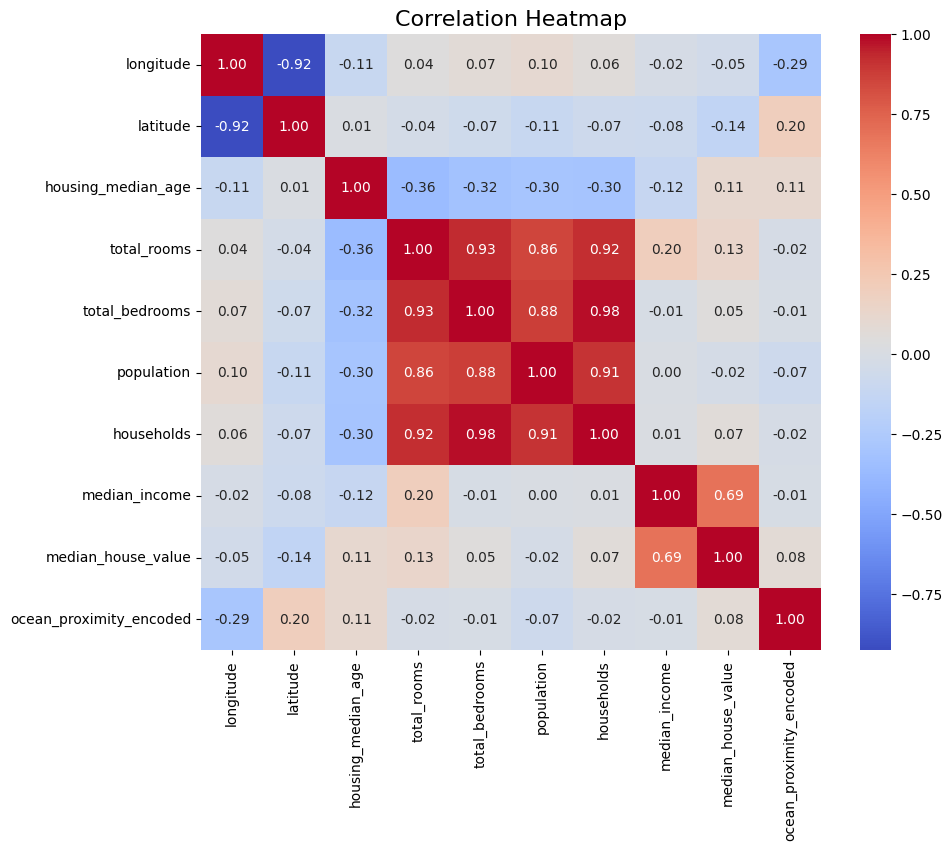

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Apply Ordinal Encoding to ocean_proximity column
encoder = OrdinalEncoder()
df['ocean_proximity_encoded'] = encoder.fit_transform(df[['ocean_proximity']])

# Correlation calculation
columns_to_include = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix = df[columns_to_include].corr()

# Show correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## Data Cleaning

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


### Missing values

In [ ]:
# Drop rows with any null values
df.dropna(inplace=True)

# Display the number of rows and columns after dropping null values
print(f"Number of rows after dropping null values: {df.shape[0]}")
print(f"Number of columns after dropping null values: {df.shape[1]}")

Number of rows after dropping null values: 20433
Number of columns after dropping null values: 11


### Outliers

In [ ]:
# Calcul des statistiques descriptives
stats_summary = df[numeric_columns].describe()

# Calcul de l'Intervalle Interquartile (IQR) pour identifier les valeurs aberrantes
Q1 = df[numeric_columns].quantile(0.25)  # 1er quartile
Q3 = df[numeric_columns].quantile(0.75)  # 3e quartile
IQR = Q3 - Q1  # Intervalle interquartile

# Détection des valeurs aberrantes
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column :\n", outliers.sum())

Number of outliers per column :
 longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value    1064
dtype: int64


In [ ]:
#  Outlier Imputation - Replacing Outliers with the Median
for col in numeric_columns:
    median = df[col].median()
    #The pandas "where" method keeps the values ​​that satisfy a condition (~outliers[col] non outliers) and replaces the others with a given value.
    df[col] = df[col].where(~outliers[col], median)

### Inconsistent or redundant data

In [ ]:
# Check the logical limits of variables
print("Valeurs incohérentes pour median_income :", df[df['median_income'] < 0])
print("Valeurs incohérentes pour longitude et latitude :", df[(df['longitude'] < -125) | (df['longitude'] > -114) | (df['latitude'] < 32) | (df['latitude'] > 42)])

# Check for inconsistencies between total_rooms and total_bedrooms
print("Incohérences entre total_rooms et total_bedrooms :")
print(df[df['total_rooms'] < df['total_bedrooms']])

# Check unique categories in ocean_proximity
print("Catégories uniques dans ocean_proximity :", df['ocean_proximity'].unique())

Valeurs incohérentes pour median_income : Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, ocean_proximity_encoded]
Index: []
Valeurs incohérentes pour longitude et latitude : Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, ocean_proximity_encoded]
Index: []
Incohérences entre total_rooms et total_bedrooms :
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, ocean_proximity_encoded]
Index: []
Catégories uniques dans ocean_proximity : ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
# Identify feature pairs with absolute correlation > 0.9
strongly_correlated = correlation_matrix[correlation_matrix.abs() > 0.9]
print("Attributs fortement corrélés :\n", strongly_correlated)

# Find exact duplicates
duplicates = df.duplicated()
print("Nombre de doublons :", duplicates.sum())

Attributs fortement corrélés :
                          longitude  latitude  housing_median_age  total_rooms  \
longitude                 1.000000 -0.924664                 NaN          NaN   
latitude                 -0.924664  1.000000                 NaN          NaN   
housing_median_age             NaN       NaN                 1.0          NaN   
total_rooms                    NaN       NaN                 NaN     1.000000   
total_bedrooms                 NaN       NaN                 NaN     0.930380   
population                     NaN       NaN                 NaN          NaN   
households                     NaN       NaN                 NaN     0.918484   
median_income                  NaN       NaN                 NaN          NaN   
median_house_value             NaN       NaN                 NaN          NaN   
ocean_proximity_encoded        NaN       NaN                 NaN          NaN   

                         total_bedrooms  population  households  \
longitude

In [ ]:
#Delete feature strongly correlated - Delete column "total_dedrooms" and "households"
redundant_columns = ['total_bedrooms', 'households']
df.drop(columns=redundant_columns, inplace=True)

df.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,322.0,3.5365,452600.0,NEAR BAY,3.0
1,-122.22,37.86,21.0,2127.0,2401.0,3.5365,358500.0,NEAR BAY,3.0
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,NEAR BAY,3.0
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,NEAR BAY,3.0
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,NEAR BAY,3.0


## Feature Engineering

### Visualizing relationships between “median_house_value” and other features

In [ ]:
features=df.drop(columns=['median_house_value', 'ocean_proximity'])
for feature in features:
    plt.figure(figsize=(8, 6))

    if df[feature].dtype in ['float64', 'int64']:  # Numerical feature
        sns.scatterplot(x=df[feature], y=df['median_house_value'], alpha=0.5)
        plt.title(f"Relation between {feature} and median_house_value")
        plt.xlabel(feature)
        plt.ylabel("Median House Value")
    else:  # Categorical feature
        sns.boxplot(x=df[feature], y=df['median_house_value'])
        plt.title(f"Median House Value by {feature}")
        plt.xlabel(feature)
        plt.ylabel("Median House Value")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Preprocessing Imbalance and Skewed Feature

In [ ]:
#Use logarithmic transformations to reduce skewness and imbalance
#total_rooms and population have some coleration with “median_house_value”, so better reduce skewness and imbalance
df['total_rooms'] = np.log1p(df['total_rooms'])
df['population'] = np.log1p(df['population'])

### Standardisation

In [ ]:
df_pre=df.copy()
#Scale columns
scaler = StandardScaler()
df_pre.drop(columns=['ocean_proximity'], inplace=True)
scaled_columns=df_pre.drop(columns=['ocean_proximity_encoded']).columns

# Apply scaling to the selected columns
scaled_values = scaler.fit_transform(df_pre[scaled_columns])

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(scaled_values, columns=scaled_columns, index=df_pre.index)

# Add 'ocean_proximity_encoded' into the scaled DataFrame
df_scaled['ocean_proximity_encoded'] = df_pre['ocean_proximity_encoded']

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_encoded
0,-1.327314,1.051717,0.982163,-1.167309,-1.800225,-0.080765,2.823735,3.0
1,-1.322323,1.042355,-0.606210,0.181424,1.285999,-0.080765,1.811015,3.0
2,-1.332305,1.037674,1.855769,-0.386408,-1.137362,2.458941,1.742137,3.0
3,-1.337296,1.037674,1.855769,-0.601982,-0.956534,1.357098,1.625906,3.0
4,-1.337296,1.037674,1.855769,-0.228191,-0.937392,0.130622,1.635592,3.0


### Feature Distribution after Feature Engineering

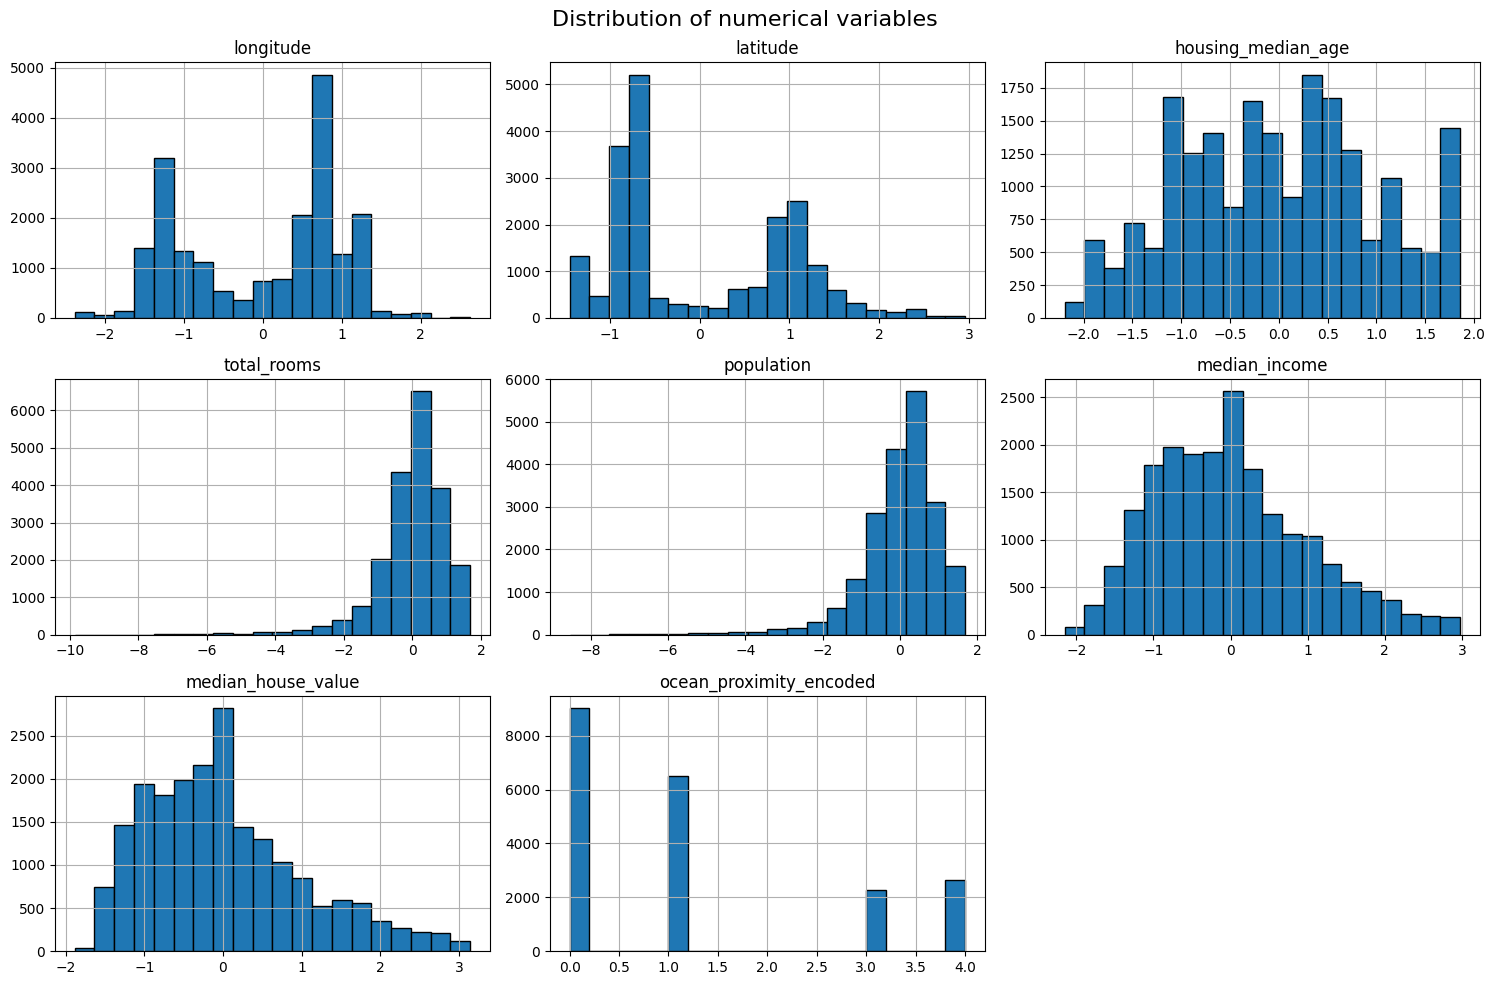

In [ ]:
df_scaled.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of numerical variables", fontsize=16)
plt.tight_layout()
plt.show()

The distribution fo "ocean_proximity_encoded" shows a clear imbalance, with certain categories being much more frequent than others. This is typical for categorical data.
"median_house_value" and "median_incomes" appear slightly skewed, but this is common in housing datasets, where lower-priced homes or lower-income groups often dominate.

## Machine Learning

### Definition of features and target

In [ ]:
#Define features and target
target=df_scaled['median_house_value']
features=df_scaled.drop(columns=['median_house_value'])
target.head()

,median_house_value
0,2.823735
1,1.811015
2,1.742137
3,1.625906
4,1.635592


In [26]:
features.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,ocean_proximity_encoded
0,-1.327314,1.051717,0.982163,-1.167309,-1.800225,-0.080765,3.0
1,-1.322323,1.042355,-0.606210,0.181424,1.285999,-0.080765,3.0
2,-1.332305,1.037674,1.855769,-0.386408,-1.137362,2.458941,3.0
3,-1.337296,1.037674,1.855769,-0.601982,-0.956534,1.357098,3.0
4,-1.337296,1.037674,1.855769,-0.228191,-0.937392,0.130622,3.0


In [27]:
# Split the preprocessed features and target into training and testing sets with shuffle
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, shuffle=True, random_state=42)

In [28]:
# Define regression models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

### Training with train/test split

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"{model_name} Results on Test Set:")
    print(f"  Mean Squared Error (MSE): {mse:.3f}")
    print(f"  R² Score: {r2:.3f}")

LinearRegression Results on Test Set:
  Mean Squared Error (MSE): 0.521
  R² Score: 0.476
DecisionTree Results on Test Set:
  Mean Squared Error (MSE): 0.577
  R² Score: 0.418
RandomForest Results on Test Set:
  Mean Squared Error (MSE): 0.307
  R² Score: 0.691


### Training with Cross-validation KFold=5 Shuffle

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Cross-validation
    cv_scores = cross_val_score(model, features, target, cv=KFold(5, shuffle=True), scoring='r2', n_jobs=-1)#Shuffle the dataset because it is sort
    print(f"  Cross-validated R² Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"{model_name} Results on Test Set:")
    print(f"  Mean Squared Error (MSE): {mse:.3f}")
    print(f"  R² Score: {r2:.3f}")

Training LinearRegression...
  Cross-validated R² Score: 0.484 ± 0.013
LinearRegression Results on Test Set:
  Mean Squared Error (MSE): 0.521
  R² Score: 0.476
Training DecisionTree...
  Cross-validated R² Score: 0.409 ± 0.014
DecisionTree Results on Test Set:
  Mean Squared Error (MSE): 0.577
  R² Score: 0.418
Training RandomForest...
  Cross-validated R² Score: 0.693 ± 0.006
RandomForest Results on Test Set:
  Mean Squared Error (MSE): 0.307
  R² Score: 0.691


### Training with Cross-validation KFold=10

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")

    cv_results = cross_validate(model, features, target,cv=KFold(10, shuffle=True))
    scores = cv_results["test_score"] #default score is R2
    print(f"The R2 score is: {scores.mean():.3f} ± {scores.std():.3f}")

Training LinearRegression...
The R2 score is: 0.484 ± 0.015
Training DecisionTree...
The R2 score is: 0.417 ± 0.027
Training RandomForest...
The R2 score is: 0.699 ± 0.012


Performence lightly improved for cv=10

### Hyperparameter Searching - GridSearch

Use cross-validation to tune the huperparameters of the model, and evaluate the model on the test set

In [ ]:
# Define parameter grids for each regression model
param_grids = {
    'LinearRegression': {
        # No hyperparameters to tune for LinearRegression in scikit-learn
    },
    'DecisionTree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4]
    }
}

tuned_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=KFold(5, shuffle=True), scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    tuned_models[model_name] = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated R² for {model_name}: {grid_search.best_score_:.3f}\n")

# Evaluate each tuned model on the test set
for model_name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Results on Test Set:")
    print(f"  Mean Squared Error (MSE): {mse:.3f}")
    print(f"  R² Score: {r2:.3f}\n")

Tuning LinearRegression...
Best parameters for LinearRegression: {}
Best cross-validated R² for LinearRegression: 0.487

Tuning DecisionTree...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validated R² for DecisionTree: 0.577

Tuning RandomForest...
Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated R² for RandomForest: 0.683

LinearRegression Results on Test Set:
  Mean Squared Error (MSE): 0.521
  R² Score: 0.476

DecisionTree Results on Test Set:
  Mean Squared Error (MSE): 0.414
  R² Score: 0.583

RandomForest Results on Test Set:
  Mean Squared Error (MSE): 0.305
  R² Score: 0.692



**Linear Regression:** Acceptable performance for a simple model, but limited in nonlinear relationships.

**Decision Tree:** Good compromise between simplicity and ability to capture nonlinear relationships. However, sensitive to overfitting (**MSE sensitive**) and less robust.

**Random Forest:** Solid performance (**low MSE and good R2 score**), robust to outliers and more generalizable than Decision Tree.

**Gradient Boosting Regressor (found in the following step):** Best overall model (**R²: 0.700 ± 0.006**), offering a combination of robustness and accuracy. Slightly better performance than Random Forest thanks to sequential optimization.

### Nested cross-validation

Use a nested cross-validation, with an inner cross-validation to tune the parameters of the model and an outer cross-validation to evaluate the model's performance

In [ ]:
# Define cv
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Loop through each model
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=inner_cv, scoring='r2', n_jobs=-1)
    grid_search.fit(features, target)

    # Get the best model and parameters
    best_rf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"Best parameters: {best_params}")

    # Evaluate the best model using cross-validation
    scores = cross_val_score(best_rf, features, target, cv=outer_cv, scoring='r2', n_jobs=-1)

    print(f"Cross-validated R²: {scores.mean():.3f} ± {scores.std():.3f}")

Tuning LinearRegression...
Best parameters: {}
Cross-validated R²: 0.484 ± 0.009
Tuning DecisionTree...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Cross-validated R²: 0.585 ± 0.012
Tuning RandomForest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validated R²: 0.686 ± 0.013


We observe that the generalization performance estimated with using nested CV is almost as same as what we obtain without nested CV. The tuning procedure itself selects the model with the highest inner CV score. If there are many hyper-parameter combinations and if the inner CV scores have comparatively large standard deviations, taking the maximum value can lure us into over-estimating the true generalization performance of the result of the full learning procedure. By using an outer cross-validation procedure one gets a more trustworthy estimate of the generalization performance of the full learning procedure, including the effect of tuning the hyperparameters.

**By comparing with the results we obtained in the GridSearch step, we can find that our model in the GridSearch step is trustworthy.**

### Gradient Boosting Regressor (GBR)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning in the inner CV loop
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=inner_cv, scoring='r2', n_jobs=-1)

# Evaluate the model using nested cross-validation
nested_scores = cross_val_score(grid_search, features, target, cv=outer_cv, scoring='r2', n_jobs=-1)

# Print the results
print(f"Nested Cross-Validated R² Scores: {nested_scores}")
print(f"Mean R² Score: {nested_scores.mean():.3f} ± {nested_scores.std():.3f}")

Nested Cross-Validated R² Scores: [0.69943019 0.69085751 0.7077145  0.70473946 0.69824292]
Mean R² Score: 0.700 ± 0.006


**Linear Regression** (R² : 0.484 ± 0.009) : Performances faibles, montrant que le modèle ne capture pas bien la complexité des données. Les erreurs sont probablement liées à des relations non linéaires non prises en compte.


---


**Decision Tree** (R² : 0.585 ± 0.012) : Performances meilleures. Le modèle peut être sensible au bruit dans les données, ce qui affecte les prédictions.


---


**Random Forest** (R² : 0.686 ± 0.013) : Performances nettement meilleures grâce à l’utilisation de plusieurs arbres, mais certaines erreurs subsistent. Les erreurs peuvent être dues à des limites dans les données ou à des cas extrêmes.


---


**Gradient Boosting Regressor** (R² : 0.700 ± 0.006) : Performances globales les plus élevées, mais des erreurs restent possibles dans des cas complexes ou mal représentés dans les données d’entraînement.


### Ablation Study

In [ ]:
# Define regression models with the best hyperparameters found previously in the Gridsearch
models_para = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=5, random_state=42),
    'RandomForest': RandomForestRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42)
}

In [ ]:
features_list = list(features.columns)
ablation_results = []

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
base_mse = mean_squared_error(y_test, y_pred)
base_r2 = r2_score(y_test, y_pred)
ablation_results.append({'Removed Feature(s)': 'None', 'MSE': base_mse, 'R²': base_r2})

print(f"Training with all features - MSE: {base_mse:.3f}, R²: {base_r2:.3f}")

# Ablation Study: Remove One Feature at a Time
for feature in features_list:
    print(f"\nRemoving Feature: {feature}")

    # Remove feature
    X_train_ablation = X_train.drop(columns=[feature])
    X_test_ablation = X_test.drop(columns=[feature])

    # Train the model
    model.fit(X_train_ablation, y_train)
    y_pred_ablation = model.predict(X_test_ablation)

    # Calculate Metrics
    mse = mean_squared_error(y_test, y_pred_ablation)
    r2 = r2_score(y_test, y_pred_ablation)
    ablation_results.append({'Removed Feature(s)': feature, 'MSE': mse, 'R²': r2})

    print(f"After Removing {feature} - MSE: {mse:.3f}, R²: {r2:.3f}")

# Show results
ablation_df = pd.DataFrame(ablation_results)
print("\nAblation Study Results:")
print(ablation_df)

Training with all features - MSE: 0.307, R²: 0.691

Removing Feature: longitude
After Removing longitude - MSE: 0.388, R²: 0.609

Removing Feature: latitude
After Removing latitude - MSE: 0.380, R²: 0.617

Removing Feature: housing_median_age
After Removing housing_median_age - MSE: 0.312, R²: 0.685

Removing Feature: total_rooms
After Removing total_rooms - MSE: 0.312, R²: 0.686

Removing Feature: population
After Removing population - MSE: 0.307, R²: 0.690

Removing Feature: median_income
After Removing median_income - MSE: 0.350, R²: 0.647

Removing Feature: ocean_proximity_encoded
After Removing ocean_proximity_encoded - MSE: 0.305, R²: 0.693

Ablation Study Results:
        Removed Feature(s)       MSE        R²
0                     None  0.306895  0.690781
1                longitude  0.387632  0.609432
2                 latitude  0.380379  0.616740
3       housing_median_age  0.312370  0.685264
4              total_rooms  0.312072  0.685565
5               population  0.307278  

**Caractéristiques Cruciales :**

« median_income » : Sa suppression entraîne une dégradation des performances. Elle est essentielle pour expliquer la variance dans les prix des maisons.

« longitude » et « latitude » : Ces deux caractéristiques sont importantes car elles capturent des informations géographiques essentielles pour prédire les prix.


---



**Caractéristiques Modérément Importantes :**

« housing_median_age » : Pertinente, mais son absence n'entraîne qu'une légère baisse de performance.

« total_rooms » : Peu informative seule.


---



**Caractéristiques Moins Pertinentes :**

« population » : Très faible impact sur les performances.

« ocean_proximity_encoded » : Faible valeur ajoutée pour le modèle, ce qui peut indiquer que cette variable catégorique ne capture pas suffisamment de nuances.
